In [3]:
from scipy.io import arff
import pandas as pd
from GAN import GAN
from GAN_Twist import GAN_RF
from Dataset import Dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Diabetes

In [4]:
scaler = StandardScaler()

data = arff.loadarff('Assignment 4 files/diabetes.arff')
df = pd.DataFrame(data[0])
to_norm = df.columns.values[:-1]
original_df = df.copy()
df['class'] = df['class'].apply(lambda x: x.decode("utf-8"))
df['class'] = df['class'].astype('category')
df['class'] = df['class'].cat.codes
class_col = df['class']
df = df.drop(columns=['class'], axis=1)
scaler = MinMaxScaler()
scaler.fit(df.values)
df = pd.DataFrame(scaler.transform(df.values), columns=df.columns)
df = pd.concat([df, class_col],axis=1)
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [5]:
#Define the GAN and training parameters
noise_dim = 5
dim = 10
batch_size = 32

log_step = 100
epochs = 5001
learning_rate = 5e-4
models_dir = 'model_diabetes'

print(df.shape[1])

gan_args = [batch_size, learning_rate, noise_dim, df.shape[1], dim]
train_args = ['', epochs, log_step]

model = GAN

#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)
history = synthesizer.train(df, train_args)

9
0 [D loss: 0.712890, acc.: 42.19%] [G loss: 0.741570]
generated_data
100 [D loss: 0.678165, acc.: 67.19%] [G loss: 0.721290]
generated_data
200 [D loss: 0.683029, acc.: 53.12%] [G loss: 0.710875]
generated_data
300 [D loss: 0.693418, acc.: 46.88%] [G loss: 0.746291]
generated_data
400 [D loss: 0.692324, acc.: 50.00%] [G loss: 0.702108]
generated_data
500 [D loss: 0.691458, acc.: 46.88%] [G loss: 0.696819]
generated_data
600 [D loss: 0.696742, acc.: 51.56%] [G loss: 0.674390]
generated_data
700 [D loss: 0.685429, acc.: 62.50%] [G loss: 0.702746]
generated_data
800 [D loss: 0.687861, acc.: 54.69%] [G loss: 0.702219]
generated_data
900 [D loss: 0.682021, acc.: 60.94%] [G loss: 0.697203]
generated_data
1000 [D loss: 0.683591, acc.: 62.50%] [G loss: 0.704936]
generated_data
1100 [D loss: 0.700447, acc.: 43.75%] [G loss: 0.689594]
generated_data
1200 [D loss: 0.685782, acc.: 56.25%] [G loss: 0.703462]
generated_data
1300 [D loss: 0.688667, acc.: 51.56%] [G loss: 0.702436]
generated_data
14

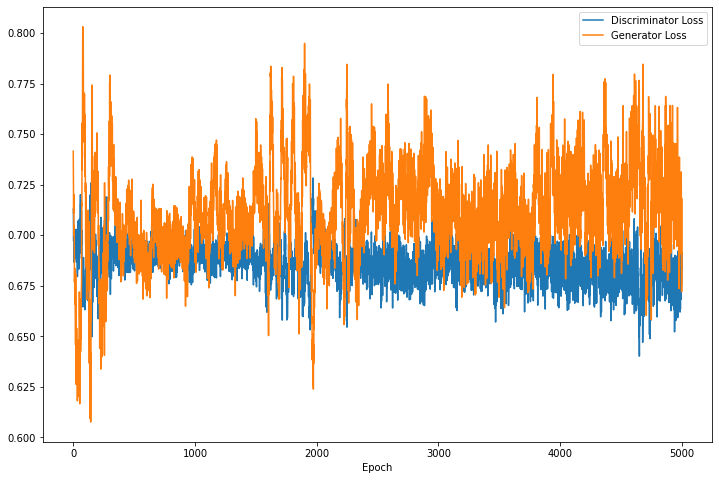

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(history['D_loss'], label='Discriminator Loss')
ax.plot(history['G_loss'], label='Generator Loss')
ax.set_xlabel('Epoch')
plt.legend()
plt.show()

In [7]:
from sklearn.decomposition import PCA

In [8]:
scalar = PCA(n_components=2, svd_solver='full')
scalar.fit(df.values)
X_embedded = scalar.transform(df.values)

In [9]:
X_embedded

array([[ 0.7069937 ,  0.15312978],
       [-0.40271091, -0.0881876 ],
       [ 0.68963127,  0.10496044],
       ...,
       [-0.34377156,  0.07261042],
       [ 0.62311372, -0.0179499 ],
       [-0.40738638, -0.17497506]])

In [10]:
len(df)

768

In [11]:
import matplotlib.pyplot as plt
import numpy as np


# Setup parameters visualization parameters
seed = 17
test_size = 100 # number of fraud cases

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real)

In [12]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

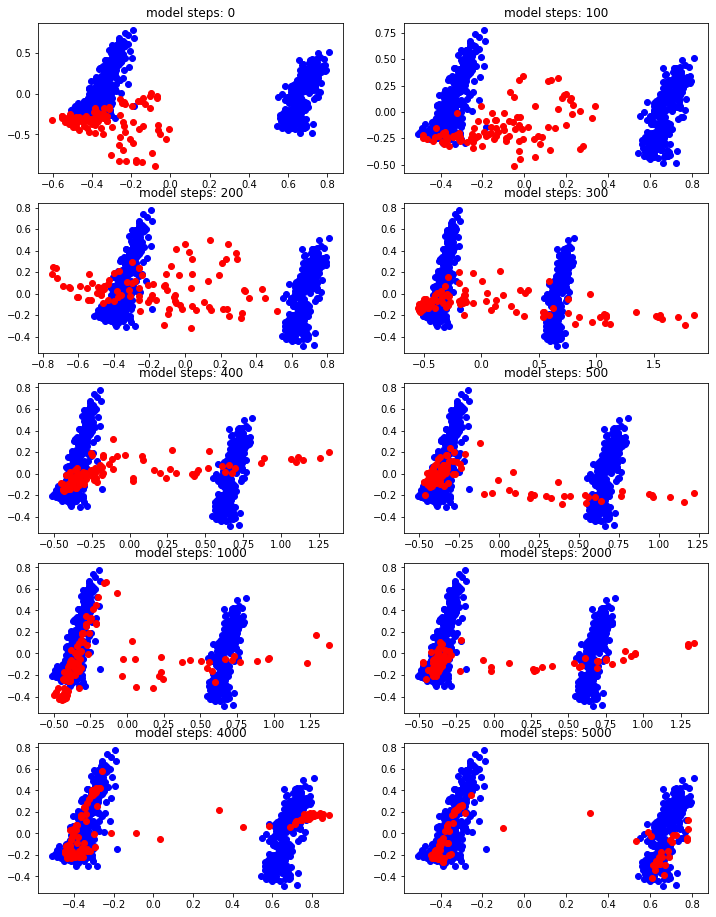

In [13]:
model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']

col1, col2 = 'CITY', 'ETHNICITY'

base_dir = 'model/'

#Actual fraud data visualization
model_steps = [ 0, 100, 200, 300, 400, 500, 1000, 2000, 4000, 5000]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)



fig, ax = plt.subplots(5, 2, figsize=(12, 16))


for model_step_ix, model_step in enumerate(model_steps):      
    [model_name, with_class, generator_model] = models['GAN']
    generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')
    g_z = generator_model.predict(z)
    g_z_emb = scalar.transform(g_z)
    ax[model_step_ix // 2, model_step_ix % 2].scatter(X_embedded[:,0], X_embedded[:,1], c='b')
    ax[model_step_ix // 2, model_step_ix % 2].scatter(g_z_emb[:, 0], g_z_emb[:, 1], c='r')
    ax[model_step_ix // 2, model_step_ix % 2].set_title(f'model steps: {model_step}')

In [14]:
fooled_samples = scaler.inverse_transform(g_z[:,:-1])
generated_df = pd.DataFrame(fooled_samples)
generated_df['8'] = g_z[:,-1]
generated_df.columns = original_df.columns
generated_df['discriminator'] = synthesizer.discriminator.predict(g_z)
generated_df['discriminator'] = generated_df['discriminator'].apply(lambda v: 1 if v > 0.5 else 0)
generated_df = generated_df.round()
generated_df[generated_df < 0] = 0
generated_df

,preg,plas,pres,skin,insu,mass,pedi,age,class,discriminator
0,1.0,72.0,54.0,0.0,13.0,24.0,1.0,23.0,0.0,0
1,1.0,96.0,74.0,22.0,94.0,28.0,0.0,42.0,-0.0,0
2,2.0,83.0,76.0,28.0,92.0,28.0,0.0,55.0,0.0,1
3,1.0,94.0,60.0,8.0,84.0,25.0,1.0,25.0,0.0,0
4,5.0,114.0,62.0,38.0,106.0,31.0,0.0,36.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
95,-0.0,104.0,65.0,8.0,47.0,25.0,0.0,25.0,-0.0,0
96,1.0,66.0,50.0,-0.0,0.0,25.0,1.0,22.0,0.0,0
97,1.0,102.0,62.0,17.0,50.0,28.0,0.0,22.0,-0.0,1
98,1.0,159.0,79.0,28.0,70.0,49.0,1.0,18.0,1.0,1


In [15]:
g_z[:,:-1].shape

(100, 8)

In [16]:
class_col = generated_df['class']
tmp = generated_df.drop(columns=['class' ,'discriminator'], axis=1)
tmp = pd.DataFrame(g_z[:,:-1], columns=df.columns[:-1])
tmp = pd.concat([tmp, class_col],axis=1)
tmp

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0.031487,0.364254,0.441054,0.001979,0.015722,0.357630,0.342724,0.034036,0.0
1,0.080621,0.481419,0.603921,0.222694,0.111650,0.410277,0.063228,0.356288,-0.0
2,0.140412,0.419289,0.626857,0.281282,0.108727,0.413933,0.097390,0.563970,0.0
3,0.047173,0.472352,0.490606,0.085812,0.099848,0.377252,0.225207,0.063667,0.0
4,0.289256,0.571422,0.507536,0.380159,0.125553,0.455032,0.175119,0.253880,0.0
...,...,...,...,...,...,...,...,...,...
95,-0.000343,0.524419,0.535160,0.078052,0.055649,0.371187,0.122343,0.071950,-0.0
96,0.049681,0.329918,0.408713,-0.001486,-0.000776,0.367701,0.349309,0.018041,0.0
97,0.029965,0.513559,0.505840,0.170151,0.059593,0.414133,0.067465,0.022444,-0.0
98,0.044021,0.798084,0.643910,0.279116,0.082349,0.726682,0.412796,-0.051659,1.0


In [17]:
pca = PCA(n_components=2, svd_solver='full')
original_emb = pca.fit_transform(df)
generated_positive_emb = pca.transform(tmp[tmp['class'].eq(1)])
generated_negative_emb = pca.transform(tmp[tmp['class'].eq(0)])
original_positive_emb = original_emb[df[df['class'].eq(1)].index.values]
original_negative_emb = original_emb[df[df['class'].eq(0)].index.values]
failed = pca.transform(tmp.iloc[generated_df[generated_df['discriminator'].eq(0)].index])

In [18]:
generated_df['discriminator'].value_counts()

0    54
1    46
Name: discriminator, dtype: int64

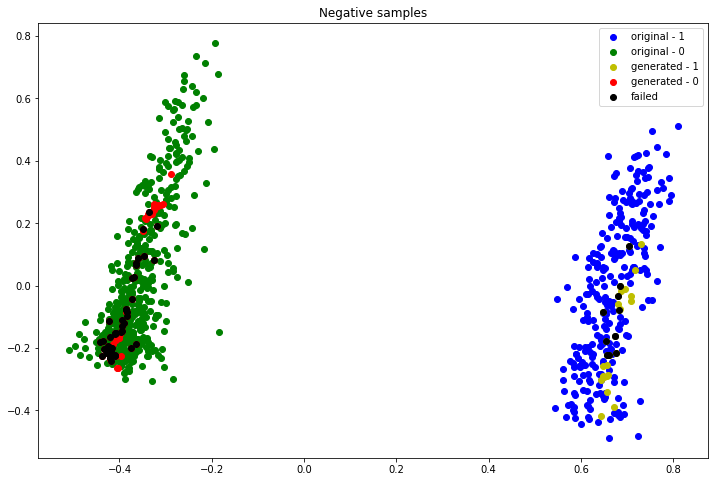

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Negative samples')
ax.scatter(original_positive_emb[:,0], original_positive_emb[:,1],label='original - 1', c='b')
ax.scatter(original_negative_emb[:,0], original_negative_emb[:,1],label='original - 0', c='g')

ax.scatter(generated_positive_emb[:,0], generated_positive_emb[:,1],label='generated - 1', c='y')
ax.scatter(generated_negative_emb[:,0], generated_negative_emb[:,1],label='generated - 0', c='r')
ax.scatter(failed[:,0], failed[:,1],label='failed', c='black')
plt.legend()
plt.show()

In [20]:
generated_df['discriminator'].value_counts()

0    54
1    46
Name: discriminator, dtype: int64

In [21]:
tmp_generated = generated_df[generated_df['discriminator'].eq(1)]
tmp_generated = tmp_generated[tmp_generated['class'].eq(0)]
tmp_generated = tmp_generated.drop(columns=['discriminator', 'class'], axis=1)
tmp_generated

,preg,plas,pres,skin,insu,mass,pedi,age
2,2.0,83.0,76.0,28.0,92.0,28.0,0.0,55.0
13,2.0,69.0,40.0,14.0,74.0,27.0,1.0,19.0
18,3.0,92.0,82.0,25.0,125.0,30.0,0.0,54.0
24,2.0,89.0,41.0,13.0,161.0,25.0,1.0,21.0
25,2.0,90.0,79.0,25.0,104.0,29.0,0.0,56.0
32,1.0,108.0,64.0,17.0,70.0,28.0,0.0,24.0
34,1.0,105.0,63.0,17.0,56.0,28.0,0.0,23.0
36,1.0,85.0,43.0,10.0,135.0,25.0,1.0,21.0
39,2.0,101.0,84.0,28.0,141.0,30.0,0.0,58.0
40,2.0,82.0,76.0,28.0,94.0,28.0,0.0,55.0


In [22]:
tmp_original = original_df
tmp_original = tmp_original[tmp_original['class'].eq(b'tested_negative')]
tmp_original = tmp_original.drop(columns=['class'], axis=1)
tmp_original

,preg,plas,pres,skin,insu,mass,pedi,age
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0
10,4.0,110.0,92.0,0.0,0.0,37.6,0.191,30.0
...,...,...,...,...,...,...,...,...
762,9.0,89.0,62.0,0.0,0.0,22.5,0.142,33.0
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0


In [23]:
from sklearn.metrics.pairwise import euclidean_distances

In [24]:
euclidean_distances(X=tmp_original, Y=tmp_original).mean()

114.76525755980178

In [25]:
generated_distances = euclidean_distances(X=tmp_generated, Y=tmp_original)
print(f'distances shape: {generated_distances.shape}')
generated_distances.mean()

distances shape: (28, 500)


101.77110353893255

In [26]:
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [27]:
columns = df.columns[:-1]

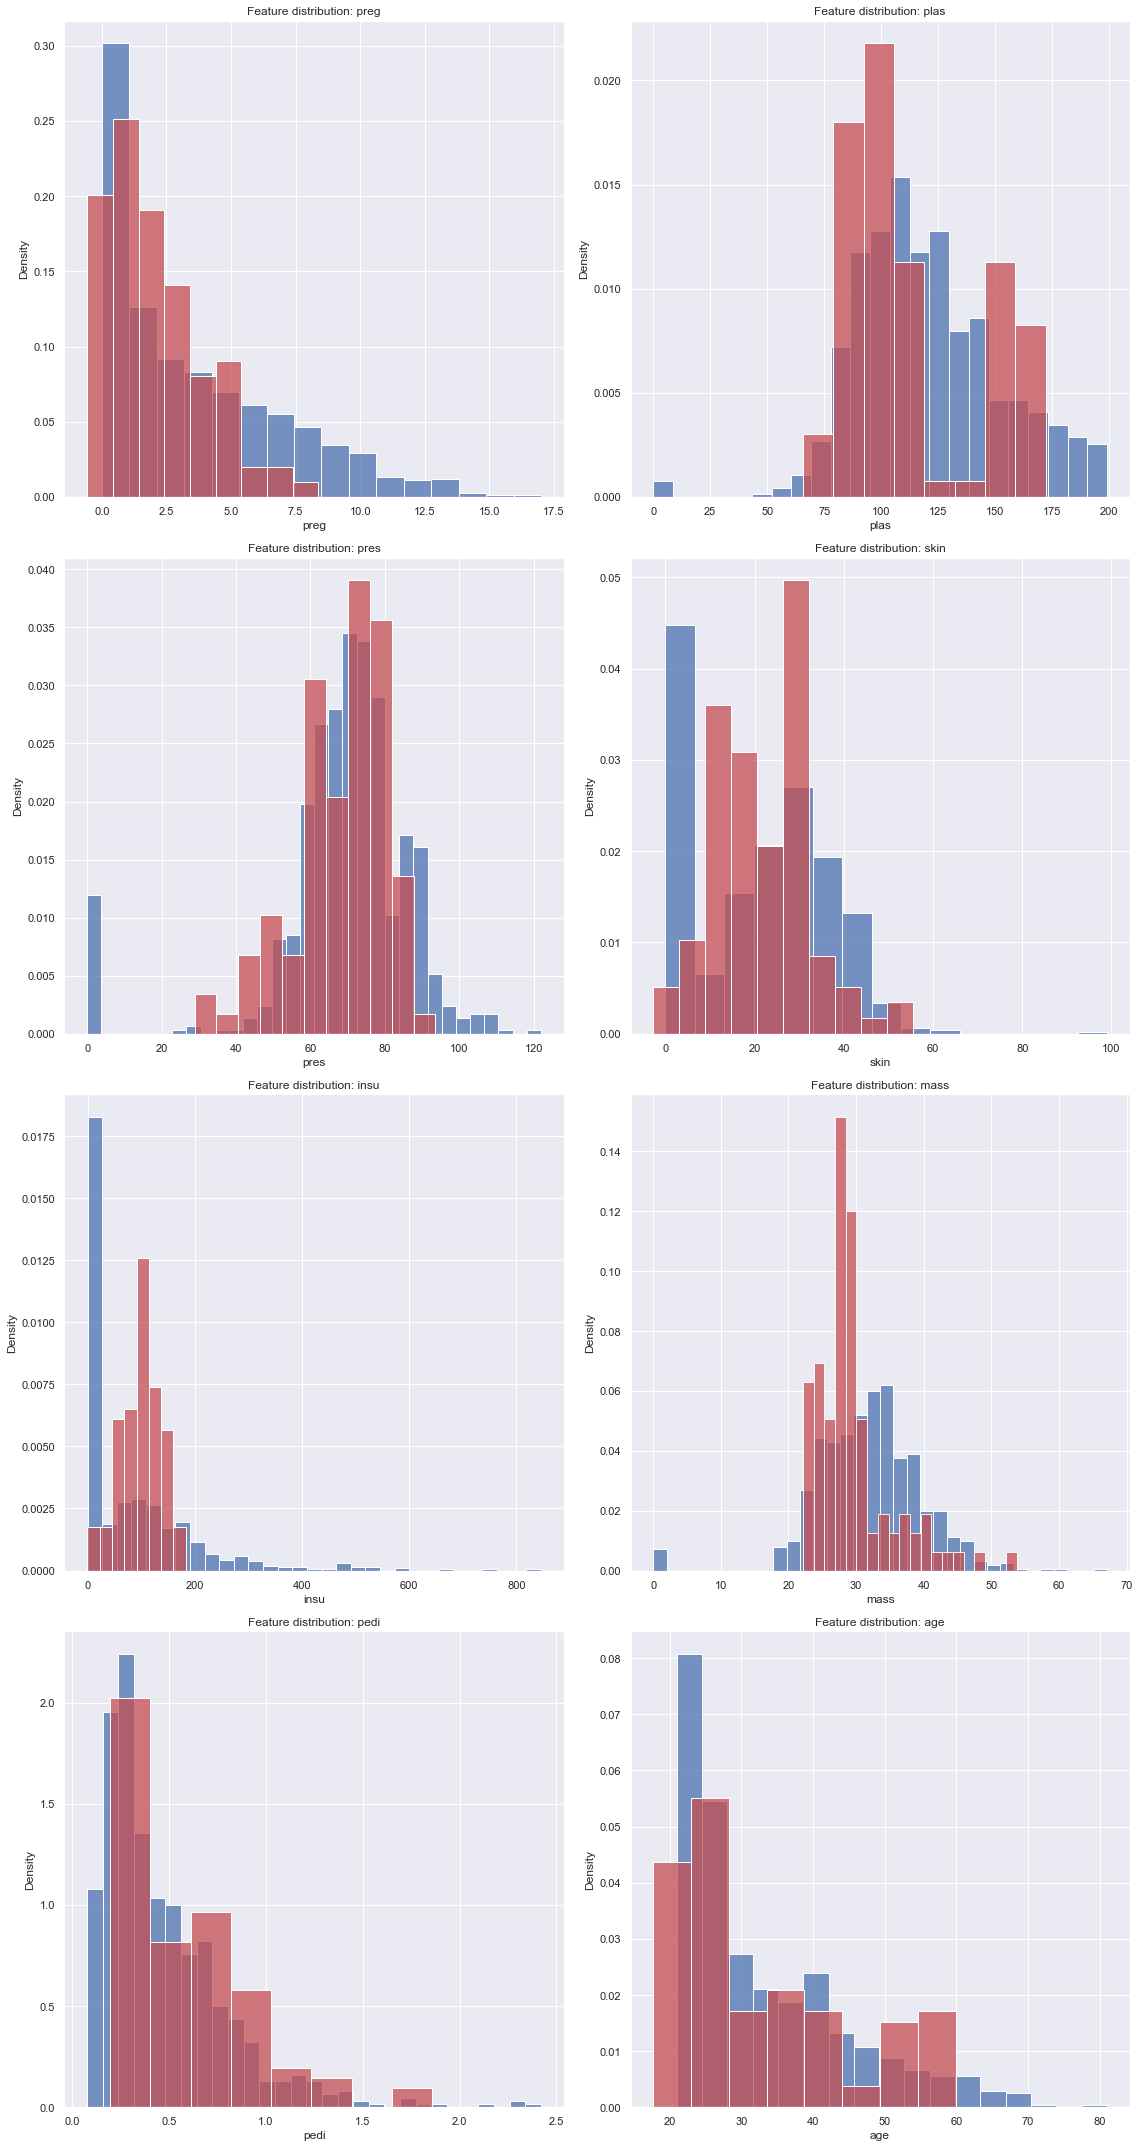

In [28]:
import seaborn as sns, numpy as np

sns.set_theme(); np.random.seed(0)

def plot_feature_dist(df, gen):
    fig, ax = plt.subplots(int(np.ceil(df.shape[1]/2)), 2, figsize=(16, 30))
    for i in range(len(columns)):
        column = columns.values[i]
        ax[i // 2, i % 2].set_title(f'Feature distribution: {column}')
        sns.histplot(df[column], label='Original', stat='density', ax=ax[i // 2, i % 2], color='b')
        sns.histplot(gen[column], label='Generated', stat='density', ax=ax[i // 2, i % 2], color='r')
    fig.tight_layout()
    plt.savefig('diabetes.png')
plot_feature_dist(pd.DataFrame(scaler.inverse_transform(df.values[:, :-1]), columns=columns), pd.DataFrame(scaler.inverse_transform(g_z[:, :-1]), columns=columns))

In [29]:
scaler.inverse_transform(df.values[:, :-1])

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

# German Credit

In [30]:
data = arff.loadarff('Assignment 4 files/german_credit.arff')
original_df = pd.DataFrame(data[0])
original_df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,b'A11',6.0,b'A34',b'A43',1169.0,b'A65',b'A75',4.0,b'A93',b'A101',...,b'A121',67.0,b'A143',b'A152',2.0,b'A173',1.0,b'A192',b'A201',b'1'
1,b'A12',48.0,b'A32',b'A43',5951.0,b'A61',b'A73',2.0,b'A92',b'A101',...,b'A121',22.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',b'2'
2,b'A14',12.0,b'A34',b'A46',2096.0,b'A61',b'A74',2.0,b'A93',b'A101',...,b'A121',49.0,b'A143',b'A152',1.0,b'A172',2.0,b'A191',b'A201',b'1'
3,b'A11',42.0,b'A32',b'A42',7882.0,b'A61',b'A74',2.0,b'A93',b'A103',...,b'A122',45.0,b'A143',b'A153',1.0,b'A173',2.0,b'A191',b'A201',b'1'
4,b'A11',24.0,b'A33',b'A40',4870.0,b'A61',b'A73',3.0,b'A93',b'A101',...,b'A124',53.0,b'A143',b'A153',2.0,b'A173',2.0,b'A191',b'A201',b'2'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'A14',12.0,b'A32',b'A42',1736.0,b'A61',b'A74',3.0,b'A92',b'A101',...,b'A121',31.0,b'A143',b'A152',1.0,b'A172',1.0,b'A191',b'A201',b'1'
996,b'A11',30.0,b'A32',b'A41',3857.0,b'A61',b'A73',4.0,b'A91',b'A101',...,b'A122',40.0,b'A143',b'A152',1.0,b'A174',1.0,b'A192',b'A201',b'1'
997,b'A14',12.0,b'A32',b'A43',804.0,b'A61',b'A75',4.0,b'A93',b'A101',...,b'A123',38.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',b'1'
998,b'A11',45.0,b'A32',b'A43',1845.0,b'A61',b'A73',4.0,b'A93',b'A101',...,b'A124',23.0,b'A143',b'A153',1.0,b'A173',1.0,b'A192',b'A201',b'2'


In [31]:
columns = original_df.columns

In [32]:
import re
for column in columns:
    if original_df[column].dtype == object:
        original_df[column] = original_df[column].apply(lambda x: x.decode("utf-8"))

In [33]:
data = arff.loadarff('Assignment 4 files/german_credit.arff')
df = pd.DataFrame(data[0])
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,b'A11',6.0,b'A34',b'A43',1169.0,b'A65',b'A75',4.0,b'A93',b'A101',...,b'A121',67.0,b'A143',b'A152',2.0,b'A173',1.0,b'A192',b'A201',b'1'
1,b'A12',48.0,b'A32',b'A43',5951.0,b'A61',b'A73',2.0,b'A92',b'A101',...,b'A121',22.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',b'2'
2,b'A14',12.0,b'A34',b'A46',2096.0,b'A61',b'A74',2.0,b'A93',b'A101',...,b'A121',49.0,b'A143',b'A152',1.0,b'A172',2.0,b'A191',b'A201',b'1'
3,b'A11',42.0,b'A32',b'A42',7882.0,b'A61',b'A74',2.0,b'A93',b'A103',...,b'A122',45.0,b'A143',b'A153',1.0,b'A173',2.0,b'A191',b'A201',b'1'
4,b'A11',24.0,b'A33',b'A40',4870.0,b'A61',b'A73',3.0,b'A93',b'A101',...,b'A124',53.0,b'A143',b'A153',2.0,b'A173',2.0,b'A191',b'A201',b'2'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'A14',12.0,b'A32',b'A42',1736.0,b'A61',b'A74',3.0,b'A92',b'A101',...,b'A121',31.0,b'A143',b'A152',1.0,b'A172',1.0,b'A191',b'A201',b'1'
996,b'A11',30.0,b'A32',b'A41',3857.0,b'A61',b'A73',4.0,b'A91',b'A101',...,b'A122',40.0,b'A143',b'A152',1.0,b'A174',1.0,b'A192',b'A201',b'1'
997,b'A14',12.0,b'A32',b'A43',804.0,b'A61',b'A75',4.0,b'A93',b'A101',...,b'A123',38.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',b'1'
998,b'A11',45.0,b'A32',b'A43',1845.0,b'A61',b'A73',4.0,b'A93',b'A101',...,b'A124',23.0,b'A143',b'A153',1.0,b'A173',1.0,b'A192',b'A201',b'2'


In [34]:
columns = df.columns

In [35]:
import re
for column in columns:
    if df[column].dtype == object:
        df[column] = df[column].apply(lambda x: x.decode("utf-8"))
        df[column] = df[column].apply(lambda v: int(re.findall('[0-9]+', v)[0]))

In [36]:
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,11,6.0,34,43,1169.0,65,75,4.0,93,101,...,121,67.0,143,152,2.0,173,1.0,192,201,1
1,12,48.0,32,43,5951.0,61,73,2.0,92,101,...,121,22.0,143,152,1.0,173,1.0,191,201,2
2,14,12.0,34,46,2096.0,61,74,2.0,93,101,...,121,49.0,143,152,1.0,172,2.0,191,201,1
3,11,42.0,32,42,7882.0,61,74,2.0,93,103,...,122,45.0,143,153,1.0,173,2.0,191,201,1
4,11,24.0,33,40,4870.0,61,73,3.0,93,101,...,124,53.0,143,153,2.0,173,2.0,191,201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,14,12.0,32,42,1736.0,61,74,3.0,92,101,...,121,31.0,143,152,1.0,172,1.0,191,201,1
996,11,30.0,32,41,3857.0,61,73,4.0,91,101,...,122,40.0,143,152,1.0,174,1.0,192,201,1
997,14,12.0,32,43,804.0,61,75,4.0,93,101,...,123,38.0,143,152,1.0,173,1.0,191,201,1
998,11,45.0,32,43,1845.0,61,73,4.0,93,101,...,124,23.0,143,153,1.0,173,1.0,192,201,2


In [37]:

# class_col = df['21']
# df = df.drop(columns=['21'], axis=1)
scaler = MinMaxScaler((-1, 1))
scaler.fit(df.values)
df = pd.DataFrame(scaler.transform(df.values), columns=df.columns)
# df = pd.concat([df, class_col],axis=1)
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,-1.000000,-0.941176,1.0,-0.983784,-0.898867,1.0,1.0,1.000000,0.333333,-1.0,...,-1.000000,0.714286,1.0,0.0,-0.333333,0.333333,-1.0,1.0,-1.0,-1.0
1,-0.333333,0.294118,0.0,-0.983784,-0.372620,-1.0,0.0,-0.333333,-0.333333,-1.0,...,-1.000000,-0.892857,1.0,0.0,-1.000000,0.333333,-1.0,-1.0,-1.0,1.0
2,1.000000,-0.764706,1.0,-0.967568,-0.796853,-1.0,0.5,-0.333333,0.333333,-1.0,...,-1.000000,0.071429,1.0,0.0,-1.000000,-0.333333,1.0,-1.0,-1.0,-1.0
3,-1.000000,0.117647,0.0,-0.989189,-0.160119,-1.0,0.5,-0.333333,0.333333,1.0,...,-0.333333,-0.071429,1.0,1.0,-1.000000,0.333333,1.0,-1.0,-1.0,-1.0
4,-1.000000,-0.411765,0.5,-1.000000,-0.491581,-1.0,0.0,0.333333,0.333333,-1.0,...,1.000000,0.214286,1.0,1.0,-0.333333,0.333333,1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,-0.764706,0.0,-0.989189,-0.836470,-1.0,0.5,0.333333,-0.333333,-1.0,...,-1.000000,-0.571429,1.0,0.0,-1.000000,-0.333333,-1.0,-1.0,-1.0,-1.0
996,-1.000000,-0.235294,0.0,-0.994595,-0.603059,-1.0,0.0,1.000000,-1.000000,-1.0,...,-0.333333,-0.250000,1.0,0.0,-1.000000,1.000000,-1.0,1.0,-1.0,-1.0
997,1.000000,-0.764706,0.0,-0.983784,-0.939034,-1.0,1.0,1.000000,0.333333,-1.0,...,0.333333,-0.321429,1.0,0.0,-1.000000,0.333333,-1.0,-1.0,-1.0,-1.0
998,-1.000000,0.205882,0.0,-0.983784,-0.824475,-1.0,0.0,1.000000,0.333333,-1.0,...,1.000000,-0.857143,1.0,1.0,-1.000000,0.333333,-1.0,1.0,-1.0,1.0


In [38]:
import re

In [39]:
#Define the GAN and training parameters
noise_dim = 5
dim = 21
batch_size = 32

log_step = 100
epochs = 5000+1
learning_rate = 5e-4
models_dir= 'model_credit'

gan_args = [batch_size, learning_rate, noise_dim, df.shape[1], dim]
train_args = [models_dir, epochs, log_step]

model = GAN

#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)
history = synthesizer.train(df, train_args)

0 [D loss: 0.627227, acc.: 50.00%] [G loss: 0.659397]
generated_data
100 [D loss: 0.527651, acc.: 73.44%] [G loss: 0.979434]
generated_data
200 [D loss: 0.564441, acc.: 64.06%] [G loss: 1.089825]
generated_data
300 [D loss: 0.604378, acc.: 75.00%] [G loss: 1.022108]
generated_data
400 [D loss: 0.561093, acc.: 78.12%] [G loss: 0.941114]
generated_data
500 [D loss: 0.476217, acc.: 79.69%] [G loss: 1.483516]
generated_data
600 [D loss: 0.558327, acc.: 75.00%] [G loss: 1.014005]
generated_data
700 [D loss: 0.443195, acc.: 84.38%] [G loss: 1.027889]
generated_data
800 [D loss: 0.378036, acc.: 85.94%] [G loss: 1.661328]
generated_data
900 [D loss: 0.550708, acc.: 81.25%] [G loss: 1.489168]
generated_data
1000 [D loss: 0.445098, acc.: 78.12%] [G loss: 1.602696]
generated_data
1100 [D loss: 0.425327, acc.: 82.81%] [G loss: 1.402282]
generated_data
1200 [D loss: 0.384463, acc.: 81.25%] [G loss: 1.554732]
generated_data
1300 [D loss: 0.433148, acc.: 79.69%] [G loss: 1.502476]
generated_data
1400

In [40]:
from sklearn.decomposition import PCA

In [41]:
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,-1.000000,-0.941176,1.0,-0.983784,-0.898867,1.0,1.0,1.000000,0.333333,-1.0,...,-1.000000,0.714286,1.0,0.0,-0.333333,0.333333,-1.0,1.0,-1.0,-1.0
1,-0.333333,0.294118,0.0,-0.983784,-0.372620,-1.0,0.0,-0.333333,-0.333333,-1.0,...,-1.000000,-0.892857,1.0,0.0,-1.000000,0.333333,-1.0,-1.0,-1.0,1.0
2,1.000000,-0.764706,1.0,-0.967568,-0.796853,-1.0,0.5,-0.333333,0.333333,-1.0,...,-1.000000,0.071429,1.0,0.0,-1.000000,-0.333333,1.0,-1.0,-1.0,-1.0
3,-1.000000,0.117647,0.0,-0.989189,-0.160119,-1.0,0.5,-0.333333,0.333333,1.0,...,-0.333333,-0.071429,1.0,1.0,-1.000000,0.333333,1.0,-1.0,-1.0,-1.0
4,-1.000000,-0.411765,0.5,-1.000000,-0.491581,-1.0,0.0,0.333333,0.333333,-1.0,...,1.000000,0.214286,1.0,1.0,-0.333333,0.333333,1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,-0.764706,0.0,-0.989189,-0.836470,-1.0,0.5,0.333333,-0.333333,-1.0,...,-1.000000,-0.571429,1.0,0.0,-1.000000,-0.333333,-1.0,-1.0,-1.0,-1.0
996,-1.000000,-0.235294,0.0,-0.994595,-0.603059,-1.0,0.0,1.000000,-1.000000,-1.0,...,-0.333333,-0.250000,1.0,0.0,-1.000000,1.000000,-1.0,1.0,-1.0,-1.0
997,1.000000,-0.764706,0.0,-0.983784,-0.939034,-1.0,1.0,1.000000,0.333333,-1.0,...,0.333333,-0.321429,1.0,0.0,-1.000000,0.333333,-1.0,-1.0,-1.0,-1.0
998,-1.000000,0.205882,0.0,-0.983784,-0.824475,-1.0,0.0,1.000000,0.333333,-1.0,...,1.000000,-0.857143,1.0,1.0,-1.000000,0.333333,-1.0,1.0,-1.0,1.0


In [42]:
scalar = PCA(n_components=2, svd_solver='full')
scalar.fit(df.values)
X_embedded = scalar.transform(df.values)

In [43]:
import matplotlib.pyplot as plt
import numpy as np


# Setup parameters visualization parameters
seed = 17
test_size = 100 # number of fraud cases

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real)

In [44]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

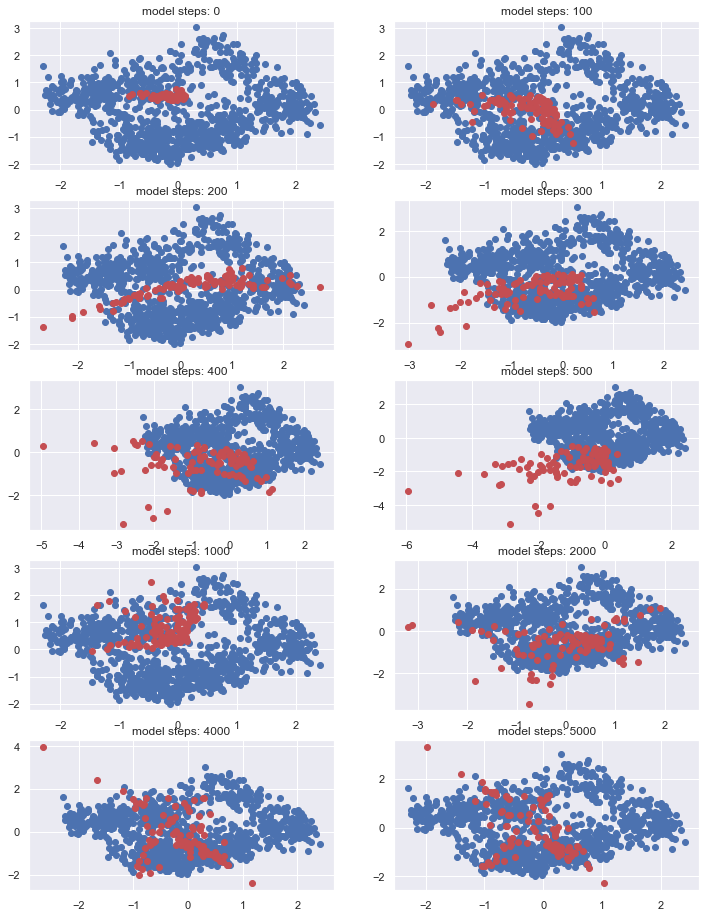

In [45]:
model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']

col1, col2 = 'CITY', 'ETHNICITY'

base_dir = 'model/'

#Actual fraud data visualization
model_steps = [ 0, 100, 200, 300, 400, 500, 1000, 2000, 4000, 5000]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)



fig, ax = plt.subplots(5, 2, figsize=(12, 16))


for model_step_ix, model_step in enumerate(model_steps):      
    [model_name, with_class, generator_model] = models['GAN']
    generator_model.load_weights( base_dir + 'model_credit_generator_model_weights_step_'+str(model_step)+'.h5')
    g_z = generator_model.predict(z)
    g_z_emb = scalar.transform(g_z)
    ax[model_step_ix // 2, model_step_ix % 2].scatter(X_embedded[:,0], X_embedded[:,1], c='b')
    ax[model_step_ix // 2, model_step_ix % 2].scatter(g_z_emb[:, 0], g_z_emb[:, 1], c='r')
    ax[model_step_ix // 2, model_step_ix % 2].set_title(f'model steps: {model_step}')

In [46]:
A_columns = original_df.columns[original_df.dtypes == object][:-1]

In [47]:
A_columns

Index(['1', '3', '4', '6', '7', '9', '10', '12', '14', '15', '17', '19', '20'], dtype='object')

In [48]:
fooled_samples = scaler.inverse_transform(g_z)
generated_df = pd.DataFrame(fooled_samples)
# generated_df['20'] = g_z[:,-1]
generated_df.columns = original_df.columns
generated_df['discriminator'] = synthesizer.discriminator.predict(g_z)
generated_df['discriminator'] = generated_df['discriminator'].apply(lambda v: 1 if v > 0.5 else 0)
generated_df['21'] = generated_df['21'].apply(lambda v: 2 if v >= 1.5 else 1)
generated_df = generated_df.round()
generated_df[generated_df < 0] = 0
for a_column in A_columns:
    generated_df[a_column] = generated_df[a_column].apply(lambda v: f'A{int(v)}')
generated_df

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,discriminator
0,A10,37.0,A32,A0,3089.0,A60,A70,5.0,A93,A101,...,21.0,A143,A152,0.0,A175,1.0,A192,A201,1,0
1,A12,11.0,A33,A56,5131.0,A61,A74,2.0,A93,A101,...,50.0,A143,A152,1.0,A173,1.0,A191,A201,1,0
2,A13,20.0,A32,A2,1980.0,A61,A72,5.0,A93,A101,...,18.0,A143,A152,1.0,A173,1.0,A191,A201,1,0
3,A14,27.0,A32,A0,3606.0,A66,A74,2.0,A92,A101,...,21.0,A142,A151,1.0,A172,1.0,A191,A201,1,0
4,A13,32.0,A32,A170,6571.0,A64,A73,2.0,A92,A101,...,41.0,A142,A152,1.0,A172,1.0,A191,A201,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,A12,29.0,A32,A64,3479.0,A61,A72,4.0,A93,A101,...,30.0,A143,A152,1.0,A173,1.0,A191,A201,1,0
96,A11,36.0,A32,A83,5065.0,A61,A71,4.0,A93,A101,...,31.0,A143,A152,1.0,A174,1.0,A192,A201,1,0
97,A12,20.0,A33,A55,4947.0,A61,A73,3.0,A93,A101,...,43.0,A143,A152,1.0,A173,1.0,A191,A201,1,0
98,A13,22.0,A32,A88,2105.0,A61,A72,4.0,A93,A101,...,29.0,A143,A152,1.0,A173,1.0,A191,A201,1,0


In [49]:
fooled_samples[:, -1]

array([0.85786974, 1.0464855 , 0.8772267 , 0.95349824, 1.1517208 ,
       1.0257795 , 1.0899862 , 1.021948  , 0.65525746, 1.1035445 ,
       0.9695606 , 0.91387427, 0.95310605, 1.1299677 , 1.0957172 ,
       1.0991119 , 1.1832021 , 0.56184864, 0.8486675 , 0.9920074 ,
       1.005691  , 0.97195613, 1.003686  , 1.1349401 , 1.1134108 ,
       0.9005997 , 0.9499681 , 0.7716199 , 0.9738524 , 1.0633215 ,
       1.1265695 , 0.91331303, 1.1378272 , 1.0403913 , 1.0661774 ,
       1.1563488 , 0.95309603, 0.9323081 , 1.0902895 , 1.0907245 ,
       0.94573617, 1.0011091 , 0.99429476, 1.1826636 , 1.0998577 ,
       0.96574044, 0.83160305, 1.0696497 , 1.1273104 , 1.0370029 ,
       0.8884771 , 1.1716155 , 0.8842436 , 1.0021793 , 0.9294132 ,
       1.0398476 , 1.1440347 , 1.0676724 , 1.1521212 , 0.98242605,
       1.0628891 , 1.0636325 , 1.0381804 , 1.0574949 , 1.0608681 ,
       1.0896566 , 0.99153125, 0.9163735 , 0.98934865, 1.0721351 ,
       1.0987358 , 0.9198854 , 1.1866026 , 1.0173721 , 1.07538

In [50]:
original_df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,A11,6.0,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1.0,A192,A201,1
1,A12,48.0,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1.0,A191,A201,2
2,A14,12.0,A34,A46,2096.0,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1.0,A172,2.0,A191,A201,1
3,A11,42.0,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2.0,A191,A201,1
4,A11,24.0,A33,A40,4870.0,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2.0,A173,2.0,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12.0,A32,A42,1736.0,A61,A74,3.0,A92,A101,...,A121,31.0,A143,A152,1.0,A172,1.0,A191,A201,1
996,A11,30.0,A32,A41,3857.0,A61,A73,4.0,A91,A101,...,A122,40.0,A143,A152,1.0,A174,1.0,A192,A201,1
997,A14,12.0,A32,A43,804.0,A61,A75,4.0,A93,A101,...,A123,38.0,A143,A152,1.0,A173,1.0,A191,A201,1
998,A11,45.0,A32,A43,1845.0,A61,A73,4.0,A93,A101,...,A124,23.0,A143,A153,1.0,A173,1.0,A192,A201,2


In [51]:
class_col = generated_df['21']
tmp = generated_df.drop(columns=['21' ,'discriminator'], axis=1)
tmp = pd.DataFrame(g_z[:,:-1], columns=df.columns[:-1])
tmp = pd.concat([tmp, class_col],axis=1)
tmp

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,-1.502389,-0.042971,-0.035347,-1.530378,-0.687602,-1.494637,-1.490399,1.542263,0.526683,-1.246314,...,-0.419989,-0.918070,1.351498,0.026831,-1.407717,1.576011,-1.340972,1.434425,-1.387257,1
1,-0.171874,-0.789522,0.500665,-0.912247,-0.462881,-0.931186,0.468000,-0.259345,0.285238,-0.829266,...,-0.225238,0.105650,1.057727,0.070905,-0.868001,0.308535,-0.840581,-1.088526,-0.954101,1
2,0.134782,-0.528808,0.125864,-1.204222,-0.809591,-1.004784,-0.441573,1.449821,0.357533,-1.263392,...,-0.143693,-1.033020,0.879396,-0.066465,-1.261999,0.287195,-1.293668,-1.244792,-1.297901,1
3,1.103687,-0.336724,-0.045956,-1.237898,-0.630709,1.306972,0.550018,-0.292085,-0.461350,-1.192973,...,-0.539108,-0.931260,0.163039,-1.303717,-1.015214,-0.222588,-1.196704,-1.260301,-1.100964,1
4,0.387339,-0.169004,0.117253,-0.297436,-0.304340,0.618085,-0.026487,-0.096286,-0.034804,-0.771308,...,0.164924,-0.215776,-0.192347,-0.070447,-0.685535,-0.450725,-0.714381,-0.041379,-0.819442,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.597819,-0.255236,-0.092272,-0.872635,-0.644619,-0.917415,-0.610736,0.737408,0.334652,-0.821021,...,-0.266799,-0.624267,0.842230,0.011589,-0.854123,0.590455,-0.751586,-0.091194,-0.706684,1
96,-0.715384,-0.071642,0.062398,-0.767567,-0.470082,-0.759958,-0.947943,0.812312,0.337973,-0.890420,...,-0.241087,-0.568107,0.741697,0.065228,-0.996984,0.795803,-0.895437,0.958495,-0.865173,1
97,-0.543860,-0.529146,0.406847,-0.917519,-0.483101,-1.088054,0.031378,0.142301,0.282529,-0.855344,...,-0.322843,-0.137653,1.108584,-0.144832,-0.784135,0.407463,-0.893854,-0.388185,-0.953358,1
98,0.002752,-0.462711,0.186157,-0.737902,-0.795833,-1.091293,-0.504890,1.113845,0.311490,-1.036718,...,-0.039202,-0.630917,1.093997,0.146532,-1.087170,0.249042,-0.903210,-1.064542,-1.056697,1


In [52]:
original_df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,A11,6.0,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1.0,A192,A201,1
1,A12,48.0,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1.0,A191,A201,2
2,A14,12.0,A34,A46,2096.0,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1.0,A172,2.0,A191,A201,1
3,A11,42.0,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2.0,A191,A201,1
4,A11,24.0,A33,A40,4870.0,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2.0,A173,2.0,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12.0,A32,A42,1736.0,A61,A74,3.0,A92,A101,...,A121,31.0,A143,A152,1.0,A172,1.0,A191,A201,1
996,A11,30.0,A32,A41,3857.0,A61,A73,4.0,A91,A101,...,A122,40.0,A143,A152,1.0,A174,1.0,A192,A201,1
997,A14,12.0,A32,A43,804.0,A61,A75,4.0,A93,A101,...,A123,38.0,A143,A152,1.0,A173,1.0,A191,A201,1
998,A11,45.0,A32,A43,1845.0,A61,A73,4.0,A93,A101,...,A124,23.0,A143,A153,1.0,A173,1.0,A192,A201,2


In [59]:
if len(tmp['21'].eq(2)) != 0 and len(tmp['21'].eq(1)) != 0:
    pca = PCA(n_components=2, svd_solver='full')
    original_emb = pca.fit_transform(df)
    generated_positive_emb = pca.transform(tmp[tmp['21'].eq(2)])
    generated_negative_emb = pca.transform(tmp[tmp['21'].eq(1)])
    original_positive_emb = original_emb[original_df[original_df['21'].eq('2')].index.values]
    original_negative_emb = original_emb[original_df[original_df['21'].eq('1')].index.values]
    failed = pca.transform(tmp.iloc[generated_df[generated_df['discriminator'].eq(0)].index])

ValueError: Found array with 0 sample(s) (shape=(0, 21)) while a minimum of 1 is required.

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Generated samples compared to original data - PCA')
ax.scatter(original_positive_emb[:,0], original_positive_emb[:,1],label='original - 1', c='b')
ax.scatter(original_negative_emb[:,0], original_negative_emb[:,1],label='original - 0', c='g')

ax.scatter(generated_positive_emb[:,0], generated_positive_emb[:,1],label='generated - 1', c='y')
ax.scatter(generated_negative_emb[:,0], generated_negative_emb[:,1],label='generated - 0', c='r')
ax.scatter(failed[:,0], failed[:,1],label='failed', c='black')
plt.legend()
plt.show()

In [ ]:
import seaborn as sns, numpy as np

sns.set_theme(); np.random.seed(0)

def plot_feature_dist(df, gen):
    fig, ax = plt.subplots(int(np.ceil(df.shape[1]/2)), 2, figsize=(16, 30))
    for column in range(df.shape[1]):
        ax[column // 2, column % 2].set_title(f'Feature distribution: {column + 1}')
        sns.histplot(df[:, column], label='Original', stat='density', ax=ax[column // 2, column % 2], color='b')
        sns.histplot(gen[:, column], label='Generated', stat='density', ax=ax[column // 2, column % 2], color='r')
    fig.tight_layout()
    plt.savefig('german_credit.png')
plot_feature_dist(scaler.inverse_transform(df.values), scaler.inverse_transform(g_z))

# PART 2

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.30, random_state=42)
print(f'train shape: {X_train.shape}')
print(f'test shape: {X_test.shape}')

train shape: (700, 20)
test shape: (300, 20)


In [12]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train.values, y_train.values)

RandomForestClassifier(max_depth=3, random_state=0)

C:\Users\amits\Anaconda3\envs\home\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


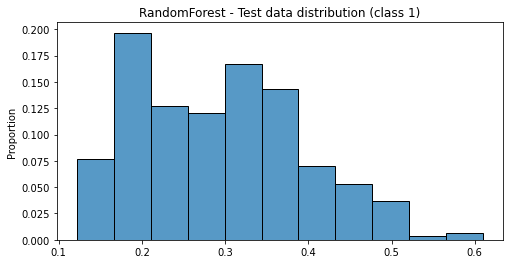

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 4))
confidence_score = clf.predict_proba(X_test)[:, 1]
sns.histplot(confidence_score, stat='proportion')
ax.set_title('RandomForest - Test data distribution (class 1)')
plt.show()

In [18]:
#Define the GAN and training parameters
noise_dim = 5
dim = 10
batch_size = 32

log_step = 100
epochs = 5000+1
learning_rate = 5e-4
models_dir = 'model_german'
C = 0.7

gan_args = [batch_size, learning_rate, noise_dim, df.shape[1], dim, C]
train_args = ['', epochs, log_step]

model = GAN_RF

#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)

In [19]:
history = synthesizer.train(df, train_args)

0 [D loss: 0.708428, acc.: 42.19%] [G loss: 0.739104]
100 [D loss: 0.693092, acc.: 51.56%] [G loss: 0.755110]
200 [D loss: 0.571596, acc.: 78.12%] [G loss: 0.751985]
300 [D loss: 0.623781, acc.: 67.19%] [G loss: 0.818185]
400 [D loss: 0.649360, acc.: 67.19%] [G loss: 0.810720]
500 [D loss: 0.666113, acc.: 60.94%] [G loss: 0.887732]
600 [D loss: 0.571792, acc.: 78.12%] [G loss: 0.936196]
700 [D loss: 0.622774, acc.: 67.19%] [G loss: 1.036445]
800 [D loss: 0.609864, acc.: 68.75%] [G loss: 0.787720]
900 [D loss: 0.592077, acc.: 70.31%] [G loss: 1.046261]
1000 [D loss: 0.651477, acc.: 62.50%] [G loss: 0.863933]
1100 [D loss: 0.615251, acc.: 67.19%] [G loss: 0.794501]
1200 [D loss: 0.577660, acc.: 64.06%] [G loss: 1.006629]
1300 [D loss: 0.590743, acc.: 68.75%] [G loss: 0.915717]
1400 [D loss: 0.589976, acc.: 73.44%] [G loss: 0.853744]
1500 [D loss: 0.505326, acc.: 87.50%] [G loss: 0.880750]
1600 [D loss: 0.505428, acc.: 79.69%] [G loss: 1.128734]
1700 [D loss: 0.596768, acc.: 65.62%] [G lo

In [20]:
from sklearn.decomposition import PCA

In [21]:
scalar = PCA(n_components=2, svd_solver='full')
scalar.fit(df.values)
X_embedded = scalar.transform(df.values)

In [22]:
import matplotlib.pyplot as plt
import numpy as np


# Setup parameters visualization parameters
seed = 17
test_size = 1000 # number of fraud cases

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real)

In [23]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

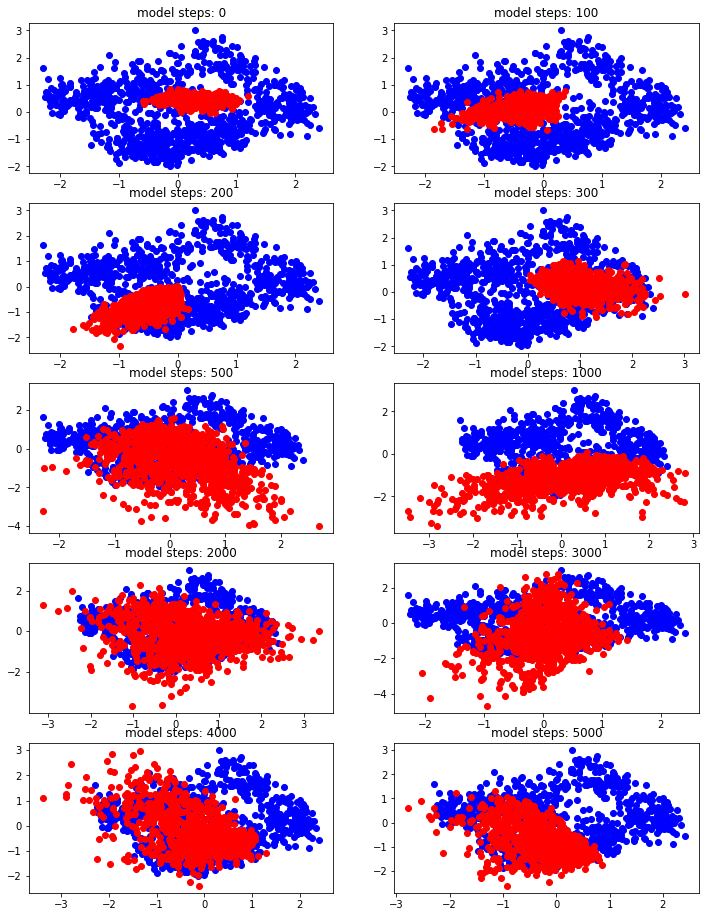

In [25]:
model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']

col1, col2 = 'CITY', 'ETHNICITY'

base_dir = 'model/'

#Actual fraud data visualization
model_steps = [ 0, 100, 200, 300, 500, 1000, 2000, 3000, 4000, 5000]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)



fig, ax = plt.subplots(5, 2, figsize=(12, 16))


for model_step_ix, model_step in enumerate(model_steps):      
    [model_name, with_class, generator_model] = models['GAN']
    generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')
    g_z = generator_model.predict([z, np.random.uniform(0, 1, test_size)])
    g_z_emb = scalar.transform(g_z)
    ax[model_step_ix // 2, model_step_ix % 2].scatter(X_embedded[:,0], X_embedded[:,1], c='b')
    ax[model_step_ix // 2, model_step_ix % 2].scatter(g_z_emb[:, 0], g_z_emb[:, 1], c='r')
    ax[model_step_ix // 2, model_step_ix % 2].set_title(f'model steps: {model_step}')

C:\Users\amits\Anaconda3\envs\home\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


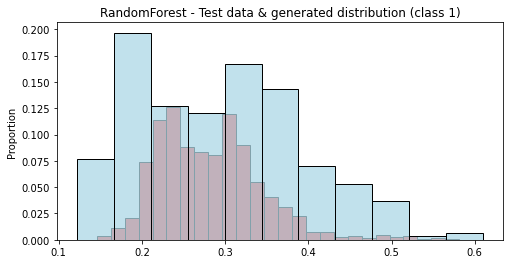

In [26]:
g_z__confidence_score_1 = clf.predict_proba(g_z[:, :-1])[:, 1]
confidence_score_1 = clf.predict_proba(X_test)[:, 1]


fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(g_z__confidence_score_1, stat='proportion', color='red')
sns.histplot(confidence_score_1, stat='proportion', color='lightblue')
ax.set_title('RandomForest - Test data & generated distribution (class 1)')
plt.show()

C:\Users\amits\Anaconda3\envs\home\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


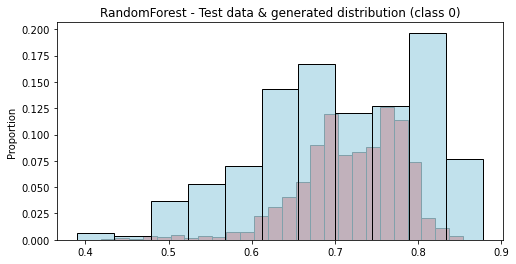

In [27]:
g_z__confidence_score_0 = clf.predict_proba(g_z[:, :-1])[:, 0]
confidence_score_0 = clf.predict_proba(X_test)[:, 0]

fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(g_z__confidence_score_0, stat='proportion', color='red')
sns.histplot(confidence_score_0, stat='proportion', color='lightblue')
ax.set_title('RandomForest - Test data & generated distribution (class 0)')
plt.show()

In [28]:
import numpy as np

In [29]:
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,-1.000000,-0.941176,1.0,-0.983784,-0.898867,1.0,1.0,1.000000,0.333333,-1.0,...,-1.000000,0.714286,1.0,0.0,-0.333333,0.333333,-1.0,1.0,-1.0,-1.0
1,-0.333333,0.294118,0.0,-0.983784,-0.372620,-1.0,0.0,-0.333333,-0.333333,-1.0,...,-1.000000,-0.892857,1.0,0.0,-1.000000,0.333333,-1.0,-1.0,-1.0,1.0
2,1.000000,-0.764706,1.0,-0.967568,-0.796853,-1.0,0.5,-0.333333,0.333333,-1.0,...,-1.000000,0.071429,1.0,0.0,-1.000000,-0.333333,1.0,-1.0,-1.0,-1.0
3,-1.000000,0.117647,0.0,-0.989189,-0.160119,-1.0,0.5,-0.333333,0.333333,1.0,...,-0.333333,-0.071429,1.0,1.0,-1.000000,0.333333,1.0,-1.0,-1.0,-1.0
4,-1.000000,-0.411765,0.5,-1.000000,-0.491581,-1.0,0.0,0.333333,0.333333,-1.0,...,1.000000,0.214286,1.0,1.0,-0.333333,0.333333,1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,-0.764706,0.0,-0.989189,-0.836470,-1.0,0.5,0.333333,-0.333333,-1.0,...,-1.000000,-0.571429,1.0,0.0,-1.000000,-0.333333,-1.0,-1.0,-1.0,-1.0
996,-1.000000,-0.235294,0.0,-0.994595,-0.603059,-1.0,0.0,1.000000,-1.000000,-1.0,...,-0.333333,-0.250000,1.0,0.0,-1.000000,1.000000,-1.0,1.0,-1.0,-1.0
997,1.000000,-0.764706,0.0,-0.983784,-0.939034,-1.0,1.0,1.000000,0.333333,-1.0,...,0.333333,-0.321429,1.0,0.0,-1.000000,0.333333,-1.0,-1.0,-1.0,-1.0
998,-1.000000,0.205882,0.0,-0.983784,-0.824475,-1.0,0.0,1.000000,0.333333,-1.0,...,1.000000,-0.857143,1.0,1.0,-1.000000,0.333333,-1.0,1.0,-1.0,1.0


In [30]:
scalar = PCA(n_components=2, svd_solver='full')
scalar.fit(df.values)
X_embedded_1 = scalar.transform(df[df['class'].eq(1)].values)
X_embedded_2 = scalar.transform(df[df['class'].eq(0)].values)

KeyError: 'class'

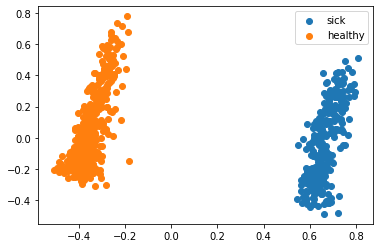

In [57]:
plt.scatter(X_embedded_1[:, 0], X_embedded_1[:, 1], label='sick')
plt.scatter(X_embedded_2[:, 0], X_embedded_2[:, 1], label='healthy')


plt.legend()
plt.show()

In [32]:
df['21'].value_counts()

-1.0    700
 1.0    300
Name: 21, dtype: int64